In [1]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
texas_fame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'
US_frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'

In [3]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_dbgen(frame_file_paths,1,10)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('Texas')

100%|██████████| 2399/2399 [07:06&lt;00:00,  5.63it/s]
Gif successfully saved


In [6]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_dbgen(frame_file_paths,1,10)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('US')

100%|██████████| 2399/2399 [08:53&lt;00:00,  4.50it/s]
Gif successfully saved


In [91]:
def show_detected_traj(obj):
    plt.figure(figsize=(10,5))
    # plt.ylim(y_lim[0],y_lim[1]) # figure height is 80
    # plt.xlim(x_lim[0],x_lim[1]) # length is 150
    detected_centers = np.concatenate([obj.detected_centers[i].reshape(1,-1) for i in range(len(obj.detected_centers)) if type              (obj.detected_centers[i]) != int])
    estimated_centers = np.concatenate([obj.estimated_centers[i].reshape(1,-1) for i in range(len(obj.estimated_centers))])
    detected_point_clouds = np.concatenate([obj.point_clouds[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]     ) != int])
    detected_box = [obj.bounding_boxes[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int]
    plt.plot(estimated_centers[:,0],estimated_centers[:,1],marker = 'o',label = 'Est')
    plt.plot(detected_centers[:,0],detected_centers[:,1], marker = 'x', label = 'Mea')
    plt.legend(fontsize = 20)
    # plt.scatter(detected_point_clouds[:,0],detected_point_clouds[:,1],s = 3)
    # for i in range(len(detected_box)):
    #     plt.plot(detected_box[i][:,0],detected_box[i][:,1],c = 'r',alpha = 0.3) # box
    #     plt.plot(detected_box[i][[0,-1],0],detected_box[i][[0,-1],1],c = 'r',alpha = 0.3)
    plt.show()

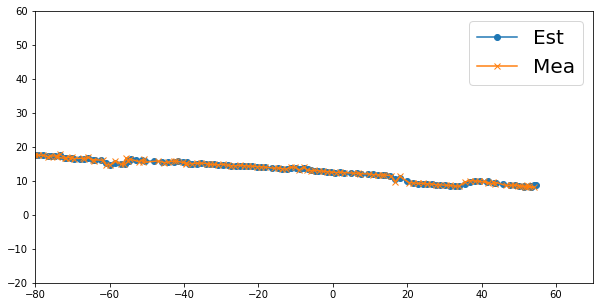

In [92]:
obj = multi_tracking.out_of_tracking_list[57]
show_detected_traj(obj)

In [19]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]


In [6]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster._dbscan_inner import dbscan_inner
from matplotlib import cm
from sklearn.cluster import DBSCAN

In [3]:
alpha = np.pi * (0.2)/180
beta = 15
corr = np.sin(alpha/2) * 2
min_sample_1 = 5146
min_sample_2 = -1.105
min_sample_3 = -120

In [7]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395')
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395/frames/2019-8-27-7-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_adbgen(frame_file_paths,beta,min_sample_1,min_sample_2,min_sample_3)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('US')

error: OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/convhull.cpp:143: error: (-215:Assertion failed) total &gt;= 0 &amp;&amp; (depth == CV_32F || depth == CV_32S) in function &#39;convexHull&#39;


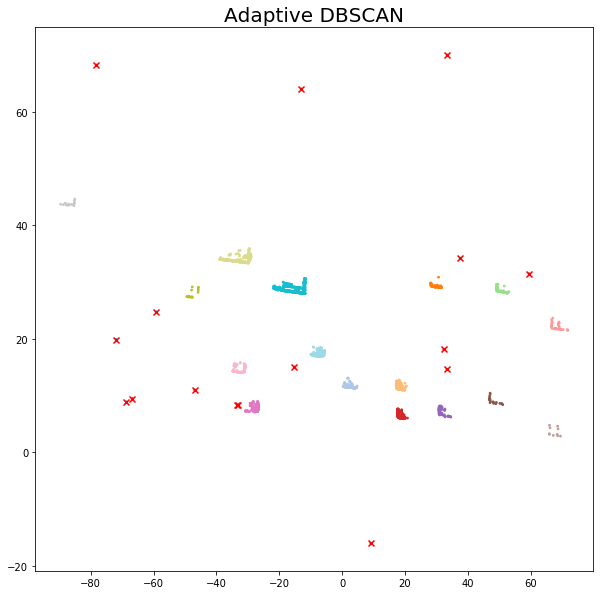

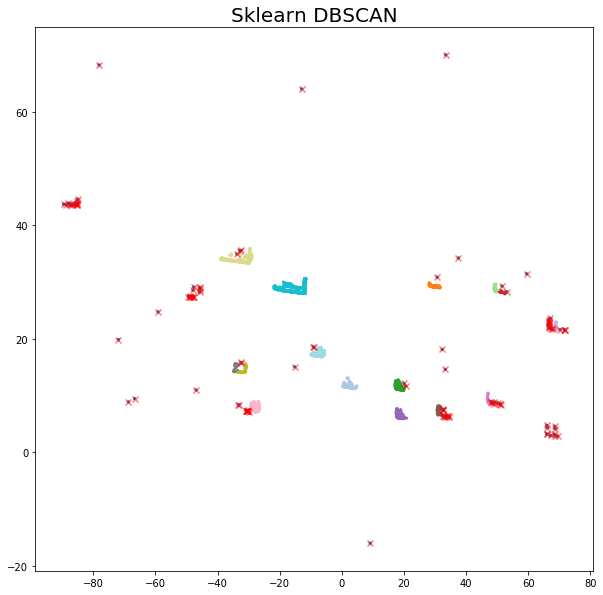

In [60]:
point_cloud = np.array(pd.read_csv(frame_file_paths[8222]).loc[:,['X','Y','distance_m']])
neighborhoods = []
for i in range(len(point_cloud)):
    radius = beta * corr * point_cloud[i,2] 
    neighbors_model = NearestNeighbors(radius=radius,leaf_size=30,p = 2)
    neighbors_model.fit(point_cloud[:,:2])
    neighborhood = neighbors_model.radius_neighbors(point_cloud[i,:2].reshape(1,-1),return_distance=False)
    neighborhoods.append(neighborhood[0])
neighborhoods = np.array(neighborhoods)
n_neighbors = np.array([len(n) for n in neighborhoods])
min_points = min_sample_1 * point_cloud[:,2]**(min_sample_2) + min_sample_3
min_points[min_points<3] = 3
core_samples = np.asarray(n_neighbors >= 5,dtype=np.uint8)
labels = np.full(point_cloud.shape[0], -1, dtype=np.intp)
dbscan_inner(core_samples, neighborhoods, labels)
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = labels,s = 3, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][labels==-1],point_cloud[:,1][labels==-1],c = 'r', marker='x')
# plt.ylim()
plt.title(r'Adaptive DBSCAN',fontsize = 20)
plt.show()
label = DBSCAN(eps=1,min_samples=10).fit_predict(X = point_cloud)
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 5, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][label==-1],point_cloud[:,1][label==-1],c = 'r', marker='x',alpha = 0.5)
plt.title(r'Sklearn DBSCAN',fontsize = 20)
plt.show()



In [15]:
%%timeit
neighbors_model = NearestNeighbors(
        radius=1, algorithm='auto',
        leaf_size=30, metric='euclidean',
        metric_params=None, p=2, n_jobs=None)
neighbors_model.fit(point_cloud)
    # This has worst case O(n^2) memory complexity
neighborhoods = neighbors_model.radius_neighbors(point_cloud[:1000],
                                                        return_distance=False)

5.97 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
neighborhoods = []
for i in range(1000):
    neighbors_model = NearestNeighbors(
            radius=1, algorithm='auto',
            leaf_size=30, metric='euclidean',
            metric_params=None, p=2, n_jobs=None)
    neighbors_model.fit(point_cloud)
        # This has worst case O(n^2) memory complexity
    neighborhood = neighbors_model.radius_neighbors(point_cloud[i].reshape(-1,2),                                            return_distance=False)
    neighborhoods.append(neighborhood)

838 ms ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
len(neighborhoods)

1000